In [1]:
from load_sim_data import *
from load_shp import *
from sim_eval_pkg import *

Updated on 2025-07-23


In [12]:
import ee
ee.Initialize()
ee.Authenticate()

True

___

### Figure 2a-2c

___

In [8]:
EM_range=[0.04,1.0]
ALB_range=[0.08,0.65]
WTROOF_range=[0,1]
WTROAD_range=[0,1]
HT_range=[8,200]
HWR_range=[0.2,8]

def plot_FO_var(var):
    if 'EM' in var:
        min_range=EM_range[0]
        max_range=EM_range[1]
    elif 'ALB' in var:
        min_range=ALB_range[0]
        max_range=ALB_range[1]
    elif var == 'WTLUNIT_ROOF':
        min_range=WTROOF_range[0]
        max_range=WTROOF_range[1]
    elif var == 'WTROAD_PERV':
        min_range=WTROAD_range[0]
        max_range=WTROAD_range[1]
    elif var == 'HT_ROOF':
        min_range=HT_range[0]
        max_range=HT_range[1]
    elif var == 'CANYON_HWR':
        min_range=HWR_range[0]
        max_range=HWR_range[1]
        
    FO_var_TBD=xr.open_dataset(f'/glade/campaign/univ/uiuc0043/02_USURF/Jackson_urban_data/OlesonFeddema/OlesonFedemma_005deg_{var}_TBD.nc')
    FO_var_HD=xr.open_dataset(f'/glade/campaign/univ/uiuc0043/02_USURF/Jackson_urban_data/OlesonFeddema/OlesonFedemma_005deg_{var}_HD.nc')
    FO_var_MD=xr.open_dataset(f'/glade/campaign/univ/uiuc0043/02_USURF/Jackson_urban_data/OlesonFeddema/OlesonFedemma_005deg_{var}_MD.nc')
    FO_var_TBD=FO_var_TBD[var]
    FO_var_HD=FO_var_HD[var]
    FO_var_MD=FO_var_MD[var]

    min_val_TBD=np.nanmin(FO_var_TBD)
    max_val_TBD=np.nanmax(FO_var_TBD)
    vmin=(min_val_TBD-min_range)/(max_range-min_range)
    vmax=(max_val_TBD-min_range)/(max_range-min_range)
    color_TBD = cm.Spectral_r(np.linspace(vmin, vmax, 33))
    cmap_TBD = LinearSegmentedColormap.from_list(var, color_TBD, N=33)
    bounds_TBD = np.linspace(min_val_TBD,max_val_TBD, 34)
    
    fig1 = plt.figure(figsize=(8,5))
    ax1 = plt.subplot(projection=ccrs.PlateCarree(central_longitude=0.0))
    fg_TBD=FO_var_TBD.plot(ax=ax1,
             transform=ccrs.PlateCarree(central_longitude=0),
             vmin = min_val_TBD,
             vmax = max_val_TBD,
             cmap=cmap_TBD)
    
    if fg_TBD.colorbar is not None:
        fg_TBD.colorbar.remove()
    
    ax1.coastlines(linewidth=1, zorder=150)
    ax1.set_aspect('auto', adjustable=None)
    ax1.add_feature(cfeature.OCEAN, color='whitesmoke', zorder=1) #below gridlines
    ax1.add_feature(cfeature.LAKES, edgecolor='gray', facecolor='whitesmoke', linewidth=1, zorder=50)
    ax1.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth=1, zorder=150)

    min_val_HD=np.nanmin(FO_var_HD)
    max_val_HD=np.nanmax(FO_var_HD)
    vmin=(min_val_HD-min_range)/(max_range-min_range)
    vmax=(max_val_HD-min_range)/(max_range-min_range)
    color_HD = cm.Spectral_r(np.linspace(vmin, vmax, 33))
    cmap_HD = LinearSegmentedColormap.from_list(var, color_HD, N=33)
    bounds_HD = np.linspace(min_val_HD,max_val_HD, 34)
    
    fig2 = plt.figure(figsize=(8,5))
    ax2 = plt.subplot(projection=ccrs.PlateCarree(central_longitude=0.0))
    fg_HD=FO_var_HD.plot(ax=ax2,
             transform=ccrs.PlateCarree(central_longitude=0),
             vmin = min_val_HD,
             vmax = max_val_HD,
             cmap=cmap_HD)
    
    if fg_HD.colorbar is not None:
        fg_HD.colorbar.remove()
    
    ax2.coastlines(linewidth=1, zorder=150)
    ax2.set_aspect('auto', adjustable=None)
    ax2.add_feature(cfeature.OCEAN, color='whitesmoke', zorder=1) #below gridlines
    ax2.add_feature(cfeature.LAKES, edgecolor='gray', facecolor='whitesmoke', linewidth=1, zorder=50)
    ax2.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth=1, zorder=150)

    min_val_MD=np.nanmin(FO_var_MD)
    max_val_MD=np.nanmax(FO_var_MD)
    vmin=(min_val_MD-min_range)/(max_range-min_range)
    vmax=(max_val_MD-min_range)/(max_range-min_range)
    color_MD = cm.Spectral_r(np.linspace(vmin,vmax, 33))
    cmap_MD = LinearSegmentedColormap.from_list(var, color_MD, N=33)
    bounds_MD = np.linspace(min_val_MD,max_val_MD, 34)
    
    fig3 = plt.figure(figsize=(8,5))
    ax3 = plt.subplot(projection=ccrs.PlateCarree(central_longitude=0.0))
    fg_MD=FO_var_MD.plot(ax=ax3,
             transform=ccrs.PlateCarree(central_longitude=0),
             vmin = min_val_MD,
             vmax = max_val_MD,
             cmap=cmap_MD)
    
    if fg_MD.colorbar is not None:
        fg_MD.colorbar.remove()
    
    ax3.coastlines(linewidth=1, zorder=150)
    ax3.set_aspect('auto', adjustable=None)
    ax3.add_feature(cfeature.OCEAN, color='whitesmoke', zorder=1) #below gridlines
    ax3.add_feature(cfeature.LAKES, edgecolor='gray', facecolor='whitesmoke', linewidth=1, zorder=50)
    ax3.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth=1, zorder=150)

    FO_var_TBD.close()
    FO_var_HD.close()
    FO_var_MD.close()

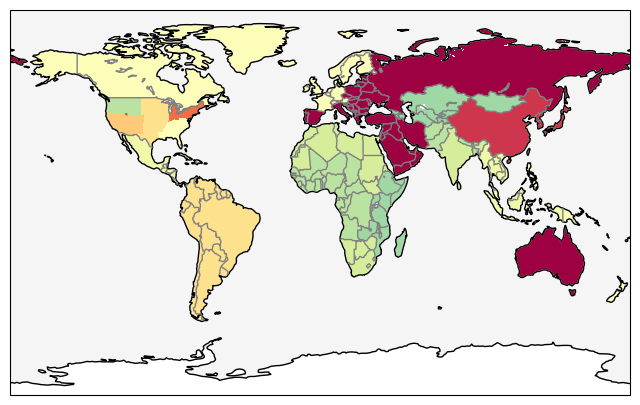

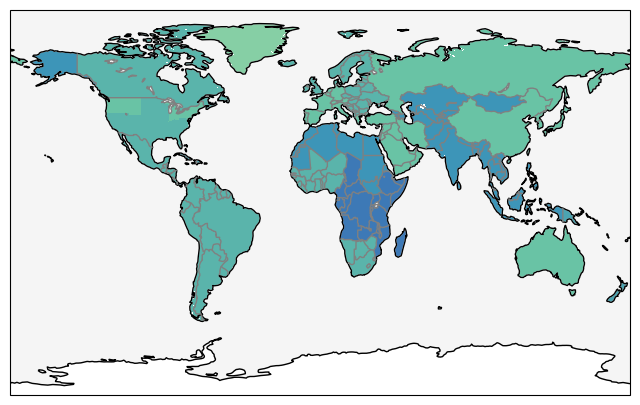

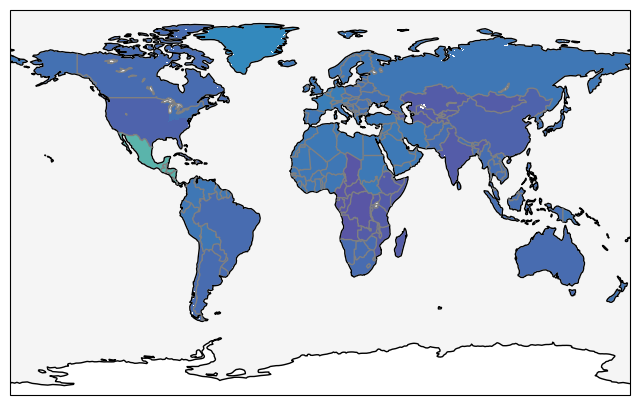

In [9]:
plot_FO_var('CANYON_HWR')

___

### Figure 2d

___

In [15]:
def cartoee_map_plot_base(var, bbox, cmap, vis_params, figsize): # without colorbar
    fig = plt.figure(figsize=figsize)
    ax = cartoee.get_map(var, cmap=cmap, vis_params=vis_params, region=bbox)

    ax.coastlines(linewidth=1, zorder=150)
    ax.set_aspect('auto', adjustable=None)
    ax.add_feature(cfeature.OCEAN, color='whitesmoke', zorder=1) #below gridlines
    ax.add_feature(cfeature.LAKES, edgecolor='gray', facecolor='whitesmoke', linewidth=1, zorder=50)
    ax.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth=1, zorder=150)

    return fig, ax
    
def cartoee_map_plot_wocb(var, bbox, cmap, vis_params, figsize, 
                          figname, savefig=True, format='png'):
    fig, ax = cartoee_map_plot_base(var, bbox, cmap, vis_params, figsize)
    if savefig:
        fig.savefig(plot_path+figname+'.'+format, format=format, dpi=600, bbox_inches='tight')

In [13]:
global_CANYON_HWR=ee.Image('projects/ee-yifancheng17/assets/global_1km_urban_data_QC/global_CANYON_HWR_1km_masked_gapfilled_QC_v1-1')

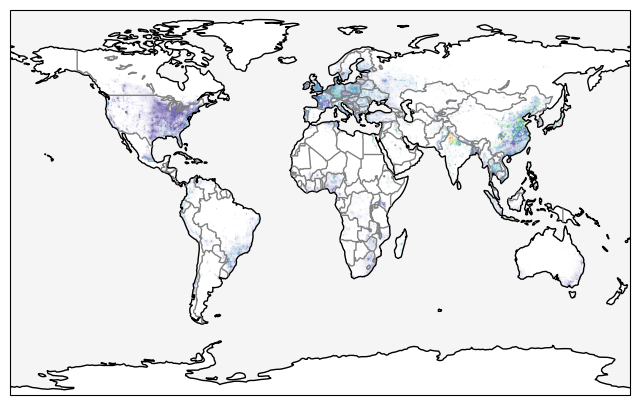

In [16]:
cartoee_map_plot_wocb(global_CANYON_HWR.select('CANYON_HWR'), [180, -88, -180, 88], 'Spectral_r',{'min':0.1, 'max':1},
                      (8,5), 'USURF_global_CANYON_HWR_1km_c250119', savefig=False, format='png')